# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [2]:
# Get the dataset
data = pd.read_csv("dataset/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Dataset Information

In [12]:
print('========')
print('Dataset information')
print('========')
data.info()

print()
print('========')
print('Dataset Description')
print('========')
data.describe()



Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB

Dataset Description


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [13]:
print('========')
print('Check if there are missing values')
print('========')
data.isnull().sum()

Check if there are missing values


Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

### Plot every variable vs each other

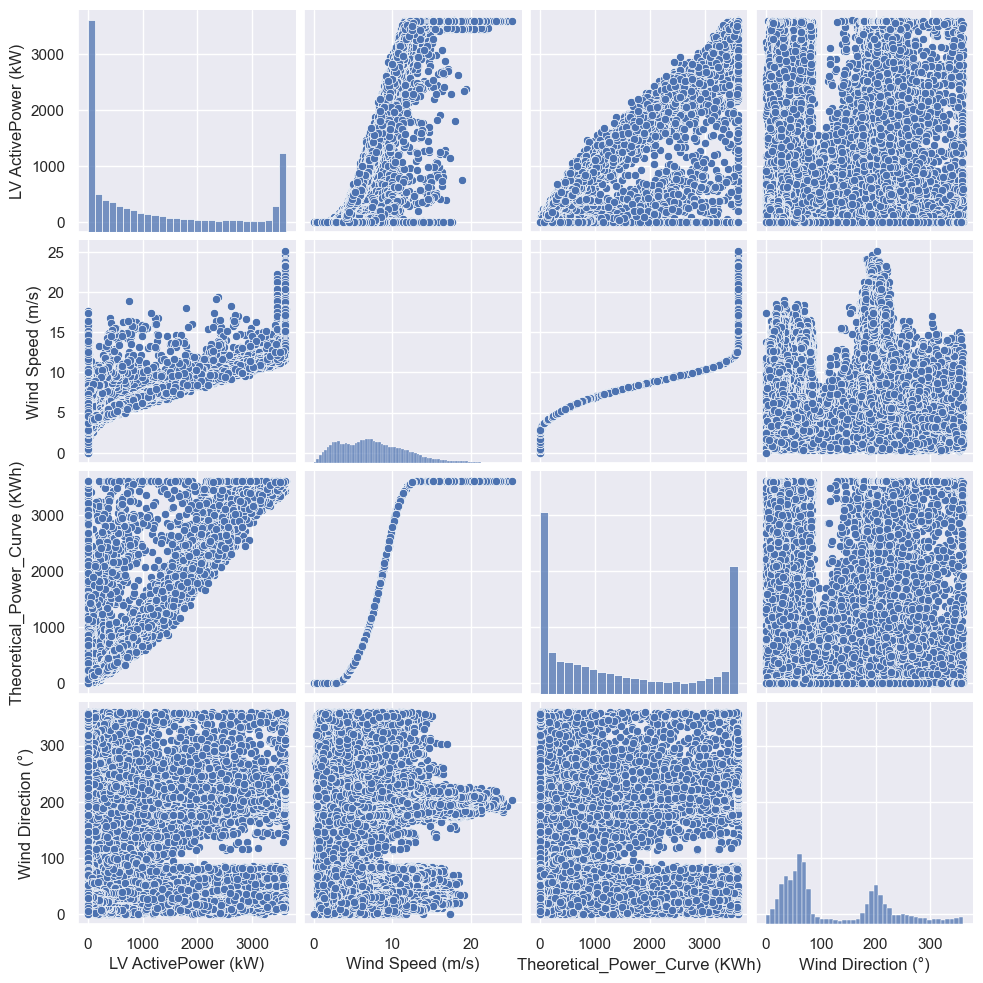

In [14]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

### Variable Correlations

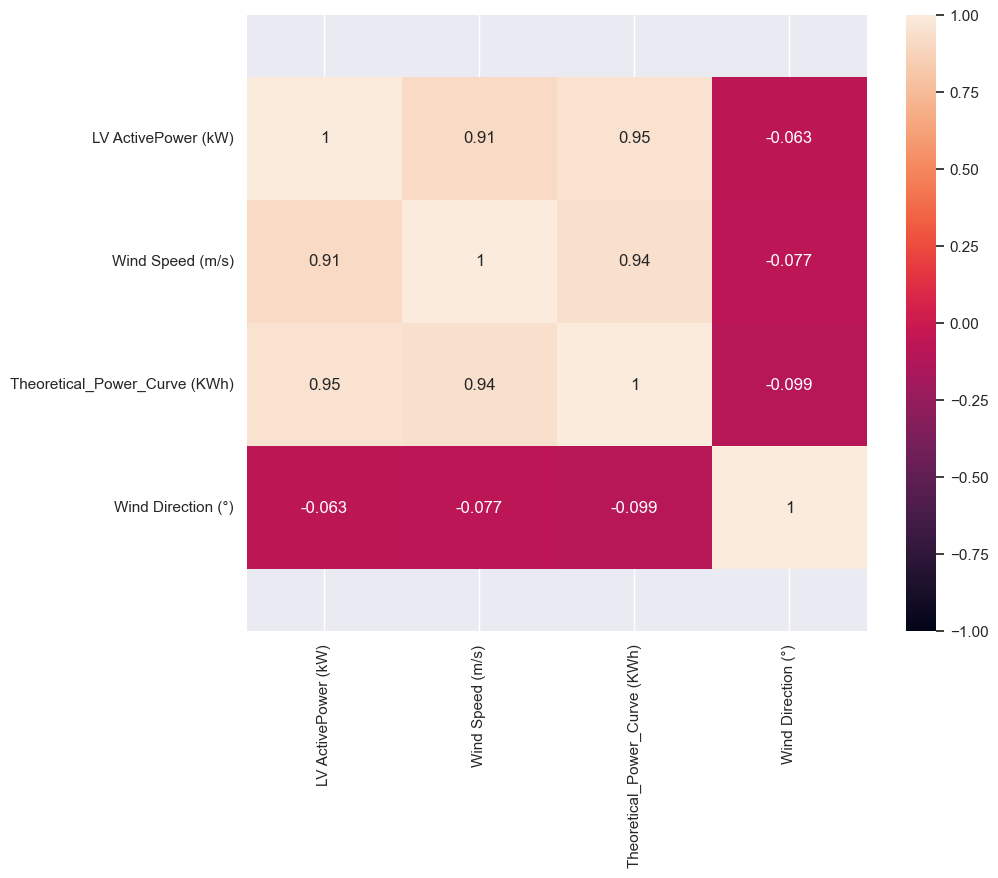

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [20]:
# Remove date from correlation table
data_correlation = data.drop(['Date/Time'], axis=1)

# Correlation between the values
corr = data_correlation.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

### Pie Bar Chart (Wind Direction VS Wind Speed)

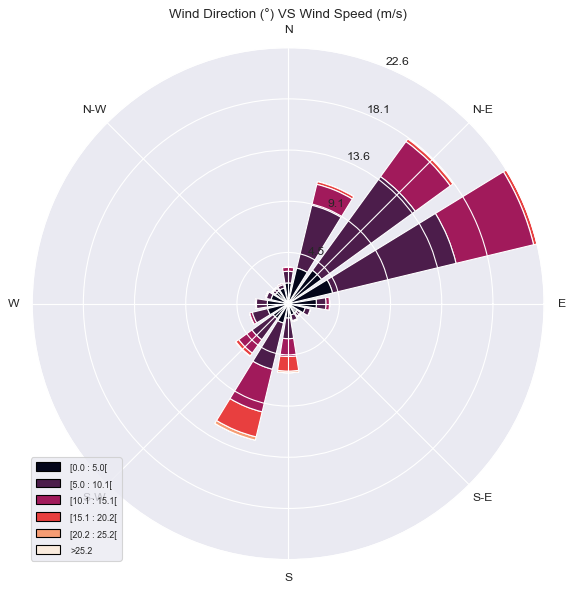

In [21]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

### Splitting Date/Time to unique columns

In [23]:
# Spliting the date time in year, month, days, hours and minutes
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


### KDE Plot

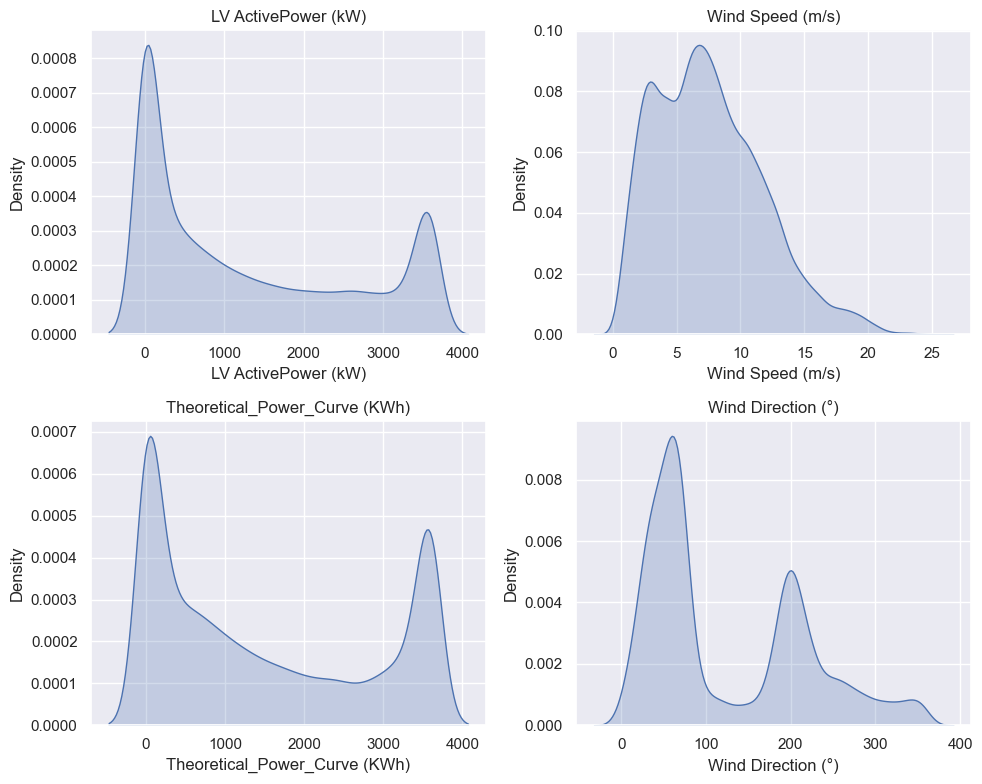

In [25]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], fill=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [12]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [26]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


### Line Graph of DateTime VS Target variable

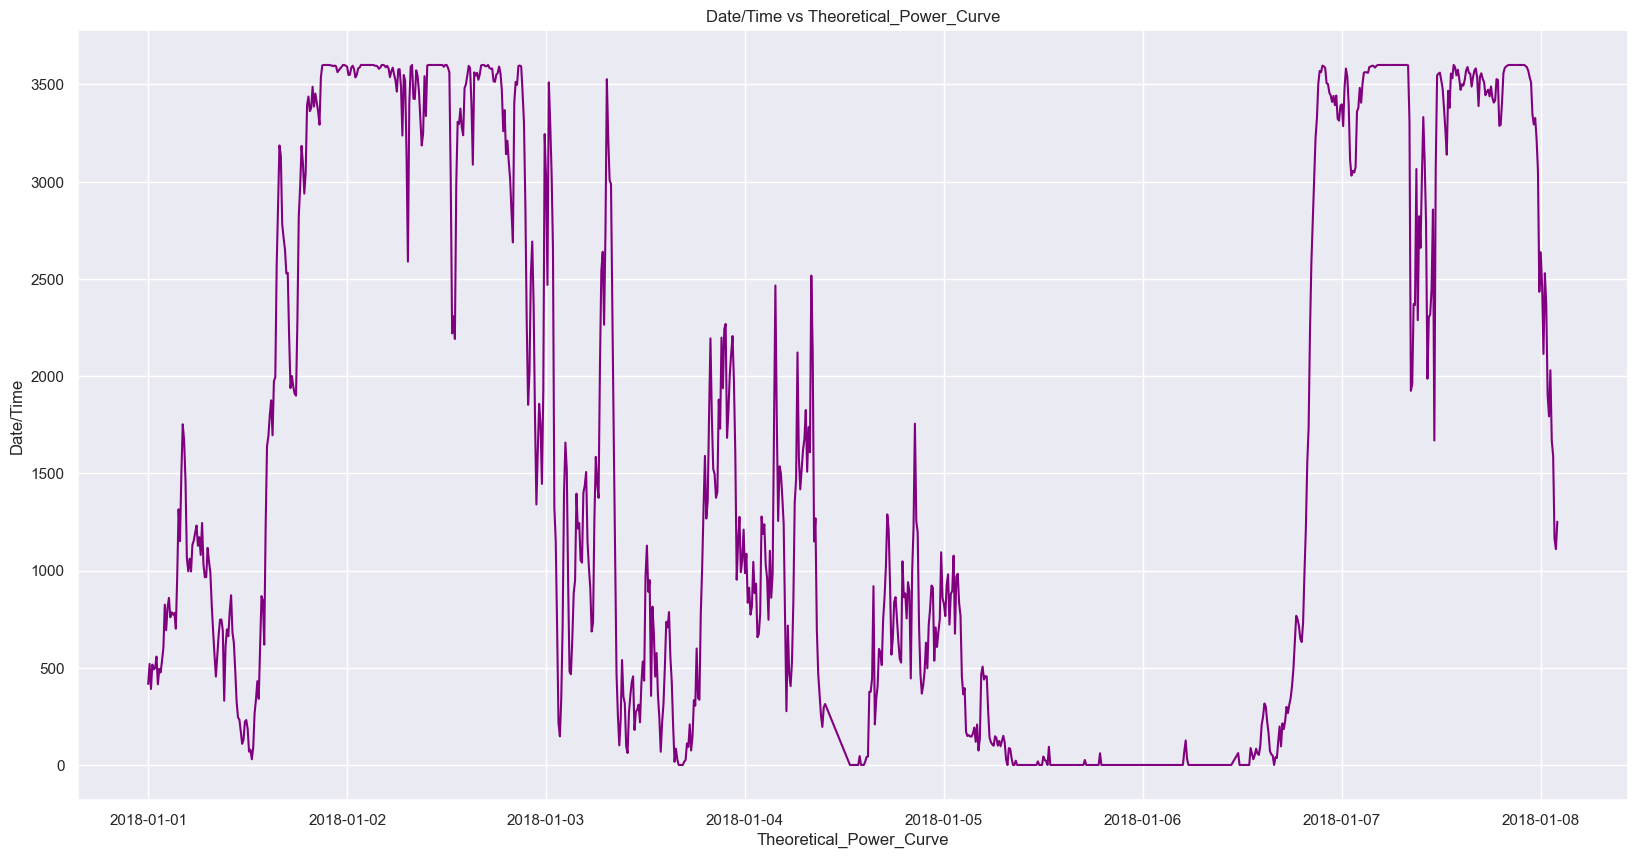

In [28]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [31]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

KeyError: "['Wind Direction (°)', 'Year', 'Month', 'Day', 'Time_Hours', 'Time_Minutes'] not found in axis"

In [33]:
df = data.copy()

# Building the LSTM model

In [52]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [35]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [36]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [37]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [38]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [39]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [61]:
# scale train and test data to [-1, 1]
def scale_data(train, test):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [62]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions.squeeze()

In [63]:
def train_model(train_data, batch_size, epochs, hidden_size):
    X, y = train_data[:, 0:-1], train_data[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    dataset = TimeSeriesDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    model = LSTM(X.shape[2], hidden_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters())
    
    model.train()
    for epoch in range(epochs):
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    
    return model

In [64]:
# make a one-step forecast
def forecast(model, X):
    model.eval()
    with torch.no_grad():
        X = torch.FloatTensor(X).reshape(1, 1, -1)
        return model(X).item()

In [65]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 18:10:00,233.953613
2018-12-31 18:20:00,287.885241
2018-12-31 18:30:00,287.241996
2018-12-31 18:40:00,302.480001
2018-12-31 18:50:00,334.719439


In [66]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [67]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [68]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [69]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale_data(train, test)

In [70]:
# fit the model
lstm_model = train_model(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

d:\Code\ChronomancerAI\venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/15, Loss: 0.0000
Epoch 2/15, Loss: 0.0000
Epoch 3/15, Loss: 0.0000
Epoch 4/15, Loss: 0.0000
Epoch 5/15, Loss: 0.0000
Epoch 6/15, Loss: 0.0000
Epoch 7/15, Loss: 0.0000
Epoch 8/15, Loss: 0.0000
Epoch 9/15, Loss: 0.0000
Epoch 10/15, Loss: 0.0000
Epoch 11/15, Loss: 0.0000
Epoch 12/15, Loss: 0.0000
Epoch 13/15, Loss: 0.0000
Epoch 14/15, Loss: 0.0000
Epoch 15/15, Loss: 0.0000


In [71]:
# walk-forward validation on the test data
predictions = []
expectations = []
predictions_plot = []
expectations_plot = []
test_pred = []

for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast(lstm_model, X)
    
    test_pred = [yhat] + test_pred
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1 < len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]), axis=0)

    X_array = np.array([x for x in X] + [yhat]).reshape(1, -1)
    yhat = scaler.inverse_transform(X_array)[0, -1]
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
            
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

Hour=1, Predicted=3614.443243, Expected=3600.000000
Hour=2, Predicted=3614.881958, Expected=3600.000000
Hour=3, Predicted=3613.912953, Expected=3600.000000
Hour=4, Predicted=3613.209896, Expected=3600.000000
Hour=5, Predicted=3612.894252, Expected=3600.000000
Hour=6, Predicted=3612.266578, Expected=3600.000000
Hour=7, Predicted=3611.714201, Expected=3600.000000
Hour=8, Predicted=3611.485374, Expected=3600.000000
Hour=9, Predicted=3611.146879, Expected=3600.000000
Hour=10, Predicted=3610.989097, Expected=3600.000000
Hour=11, Predicted=3611.148690, Expected=3600.000000
Hour=12, Predicted=3611.094713, Expected=3600.000000
Hour=13, Predicted=3610.907457, Expected=3600.000000
Hour=14, Predicted=3610.774983, Expected=3600.000000
Hour=15, Predicted=3610.942817, Expected=3600.000000
Hour=16, Predicted=3610.478197, Expected=3600.000000
Hour=17, Predicted=3610.359735, Expected=3600.000000
Hour=18, Predicted=3610.447831, Expected=3600.000000
Hour=19, Predicted=3610.368853, Expected=3600.000000
Ho

C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
C:\Users\pleno\AppData\Local\Temp\ipykernel_29584\3610996784.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 

## Calculating Mean Absolute Error

In [73]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4599073412433896


# Final Prediction Plot

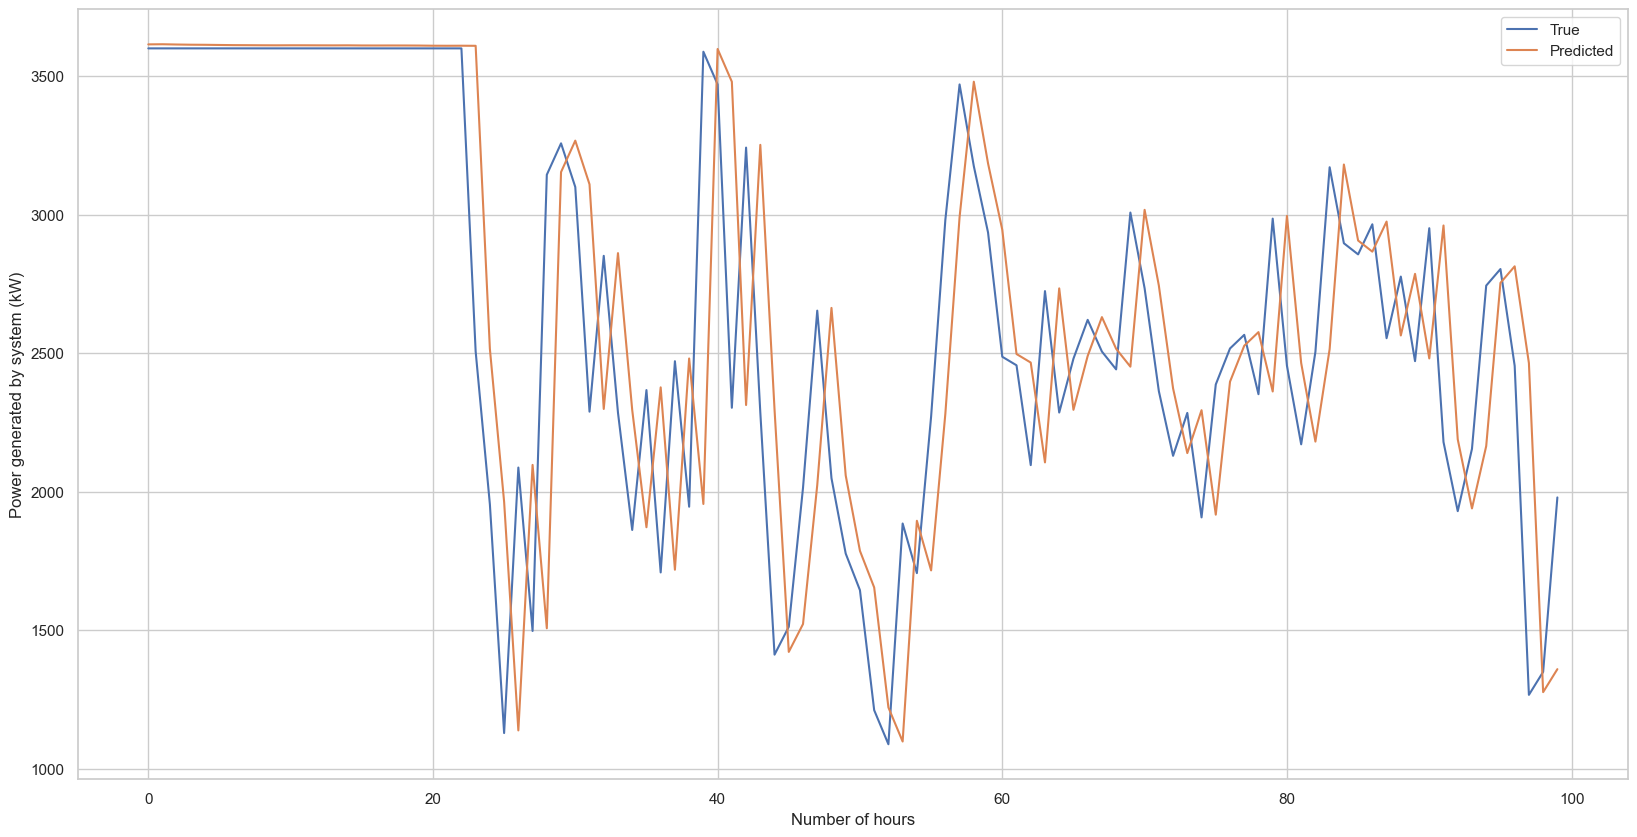

In [74]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()